## Mariia Sierova

### 🚔 Analyzing Non-Traffic Citations in Pittsburgh Neighborhoods

### 🔍 Why Citations 

Non-traffic citations serve as measurable indicators of community well-being. While not as severe as criminal offenses, these violations - including public intoxication, disorderly conduct, and quality-of-life offenses - provide critical insights into:

### The Hidden Insights in Citation Data:
- **📊 Leading Indicator**: Areas with rising citations often see increased serious crime later
- **👮 Community-Police Dynamics**: Citation patterns reveal enforcement priorities
- **🌃 Neighborhood Character**: Nightlife hubs vs. quiet residential areas stand out clearly

### 📂 The Data and Analysis

**Source**: [Western PA Regional Data Center](https://www.wprdc.org) (Pittsburgh's official open data portal)

**Dataset Includes**:
- 16,295 citations issued citywide
- 90+ Pittsburgh neighborhoods

**Key Offense Categories**:
1. Public Intoxication (5505)
2. Disorderly Conduct (5503)
3. Underage Drinking (6308)
4. Public Urination (627.02)
5. Littering (601.16)


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# Load the dataset
citations = pd.read_csv('citations.csv')

# Display first few rows
# print(citations.head())

In [36]:
# Check basic info (columns, missing values, data types)
# print(citations.info())

In [37]:
# Summary statistics
# print(citations.describe())

In [38]:
# Keep key columns
cols_to_keep = ['GENDER', 'RACE', 'AGE', 'CITEDTIME', 'OFFENSES', 'NEIGHBORHOOD', 'X', 'Y']
citations = citations[cols_to_keep]

# Drop rows with missing neighborhood 
citations = citations.dropna(subset=['NEIGHBORHOOD'])

# Convert CITEDTIME to datetime
citations['CITEDTIME'] = pd.to_datetime(citations['CITEDTIME'], errors='coerce')

# Extract year for time-based analysis
citations['YEAR'] = citations['CITEDTIME'].dt.year

The chart below shows the 10 neighborhoods with the highest number of non-traffic citations. This helps us identify areas where minor disturbances are most frequent.


We can see that neighborhoods like South Side Flats and Central Oakland have the highest citation counts. These may be due to nightlife or student populations, and they negatively impact their "safety" score in our metric.


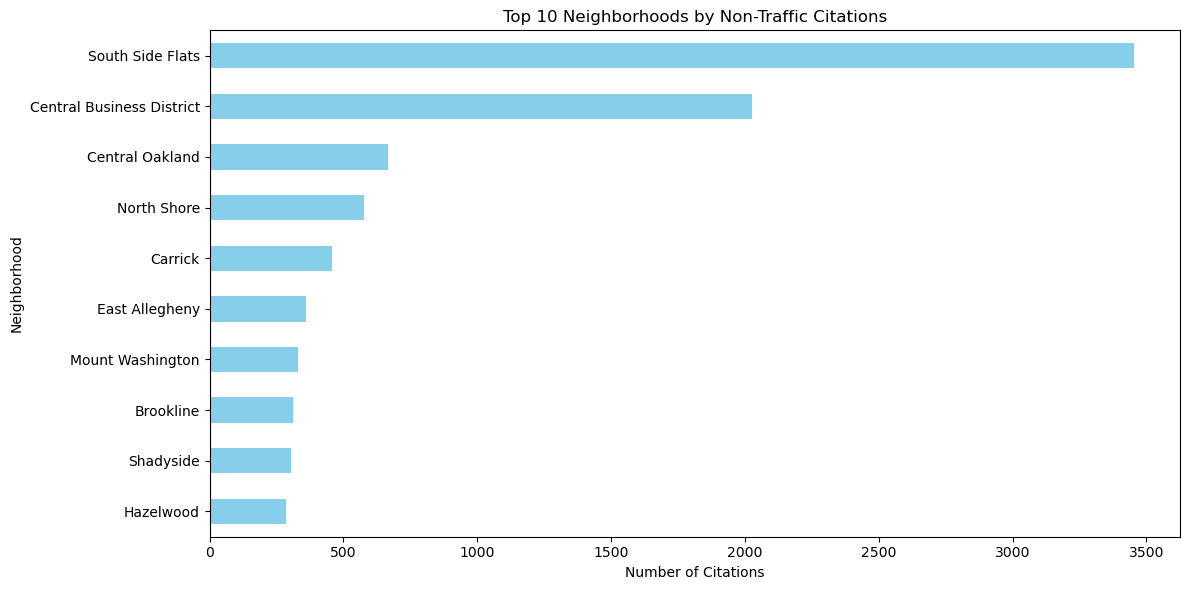

In [39]:
# Count citations per neighborhood
neighborhood_counts = citations['NEIGHBORHOOD'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
neighborhood_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Neighborhoods by Non-Traffic Citations')
plt.xlabel('Number of Citations')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

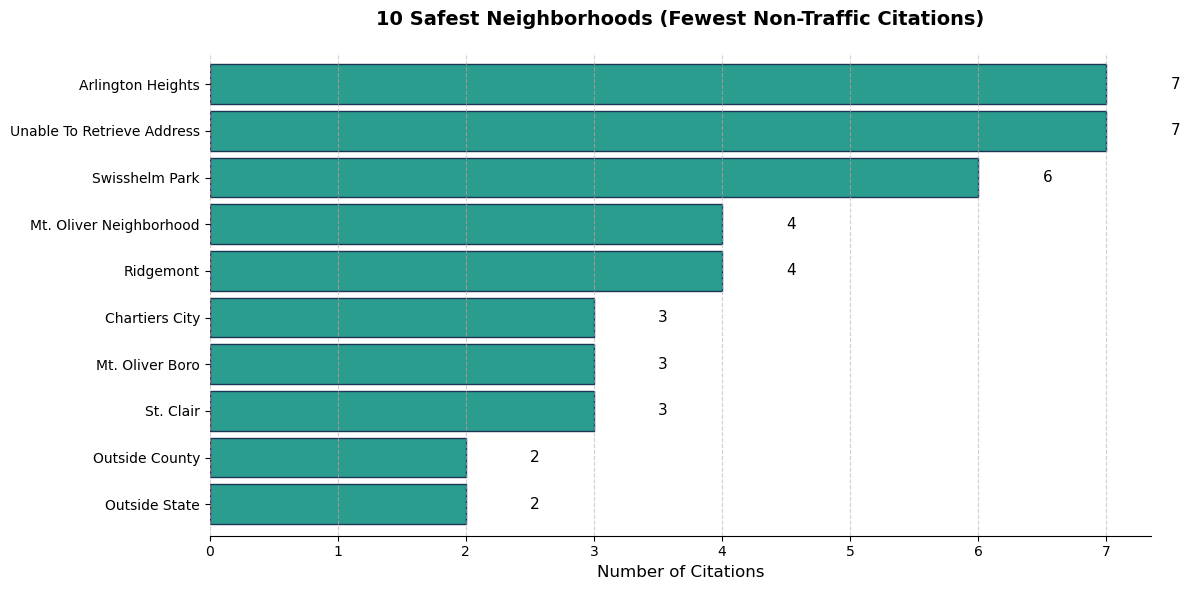

In [40]:
# Count citations per neighborhood and get BOTTOM 10
neighborhood_counts = citations['NEIGHBORHOOD'].value_counts().nsmallest(10)

# Create the plot
plt.figure(figsize=(12, 6))
ax = neighborhood_counts.sort_values(ascending=True).plot(
    kind='barh',
    color='#2a9d8f',  # Calm green color for "good" neighborhoods
    edgecolor='#1d3557',
    width=0.85
)

# Customize appearance
plt.title('10 Safest Neighborhoods (Fewest Non-Traffic Citations)', 
         fontsize=14, pad=20, weight='bold')
plt.xlabel('Number of Citations', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add value labels
for i, v in enumerate(neighborhood_counts.sort_values()):
    ax.text(v + 0.5, i, f"{int(v)}", 
            color='black', 
            va='center',
            fontsize=11)

# Remove top/right spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

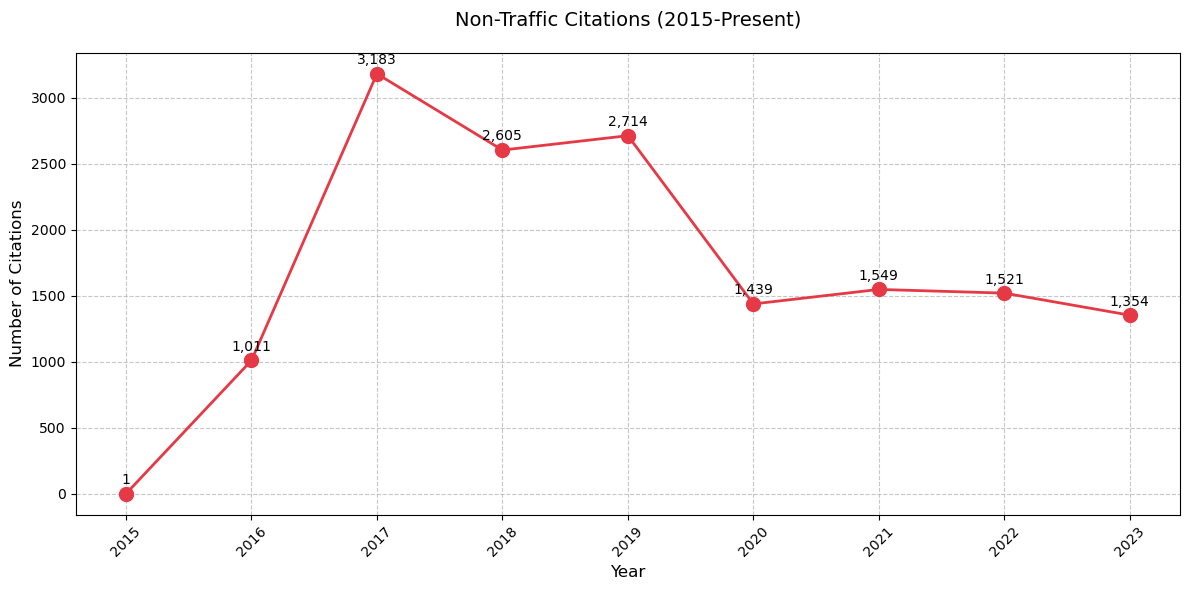

In [41]:
# Filter data for 2015 and later
citations_2015plus = citations[citations['YEAR'] >= 2015]

# Group by year and count citations
annual_counts = citations_2015plus.groupby('YEAR').size()

# Plot with enhanced styling
plt.figure(figsize=(12, 6))
ax = annual_counts.plot(marker='o', 
                       linestyle='-', 
                       color='#e63946', 
                       linewidth=2, 
                       markersize=10)

# Customize the plot
plt.title('Non-Traffic Citations (2015-Present)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Citations', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels on top of each point
for x, y in zip(annual_counts.index, annual_counts.values):
    ax.text(x, y+50, f'{y:,}', ha='center', va='bottom', fontsize=10)

# Adjust x-axis ticks to show every year
plt.xticks(annual_counts.index, rotation=45)

plt.tight_layout()
plt.show()

Interestingly, the number of citations has fluctuated over time, with a slight decline after 2020. This could be influenced by the COVID-19 pandemic or policy changes in law enforcement.

Additionally, the gender breakdown shows that males account for nearly 72% of citations, possibly reflecting broader patterns in public behavior or enforcement.


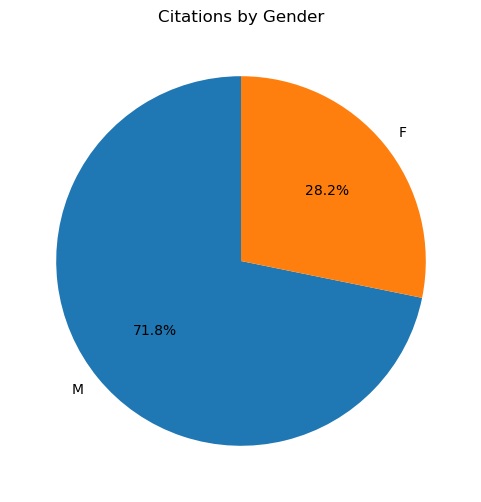

In [42]:
gender_counts = citations['GENDER'].value_counts()

plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Citations by Gender')
plt.ylabel('')
plt.show()

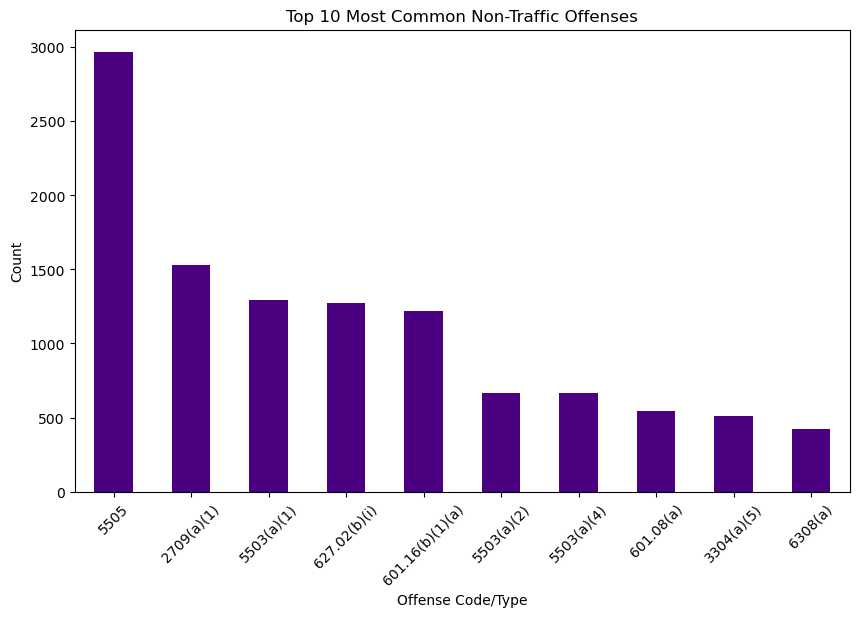

In [43]:
# Extract primary offense (first part of OFFENSES string)
citations['PRIMARY_OFFENSE'] = citations['OFFENSES'].str.split().str[0]

# Top 10 offenses
top_offenses = citations['PRIMARY_OFFENSE'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_offenses.plot(kind='bar', color='indigo')
plt.title('Top 10 Most Common Non-Traffic Offenses')
plt.xlabel('Offense Code/Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [44]:
import pandas as pd

# Your decoder dictionary
offense_decoder = {
    '5505': 'Public Drunkenness',
    '5503(a)(1)': 'Disorderly Conduct - Hazardous Physical Offense',
    '5503(a)(2)': 'Disorderly Conduct - Unreasonable Noise',
    '5503(a)(4)': 'Disorderly Conduct - Obscene Language/Gestures',
    '2709(a)(1)': 'Harassment - Communication',
    '3304(a)(5)': 'Criminal Mischief - Damage Property',
    '6308(a)': 'Underage Drinking',
    '627.02(b)(i)': 'Public Urination/Defecation',
    '601.16(b)(1)(a)': 'Littering in Public Space',
    '601.08(a)': 'Open Container Violation'
}

# Create and display the clean mapping table
mapping_table = pd.DataFrame({
    'Statute Code': list(offense_decoder.keys()),
    'Legal Definition': list(offense_decoder.values())
})

# Style with clean formatting
styled_table = mapping_table.style \
    .set_properties(**{
        'text-align': 'left',
        'font-family': 'Arial'
    }) \
    .set_caption('Pennsylvania/Pittsburgh Offense Code Reference') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#2a9d8f'), 
                 ('color', 'white'),
                 ('font-weight', 'bold')]
    }])

styled_table

,Statute Code,Legal Definition
0,5505,Public Drunkenness
1,5503(a)(1),Disorderly Conduct - Hazardous Physical Offense
2,5503(a)(2),Disorderly Conduct - Unreasonable Noise
3,5503(a)(4),Disorderly Conduct - Obscene Language/Gestures
4,2709(a)(1),Harassment - Communication
5,3304(a)(5),Criminal Mischief - Damage Property
6,6308(a),Underage Drinking
7,627.02(b)(i),Public Urination/Defecation
8,601.16(b)(1)(a),Littering in Public Space
9,601.08(a),Open Container Violation


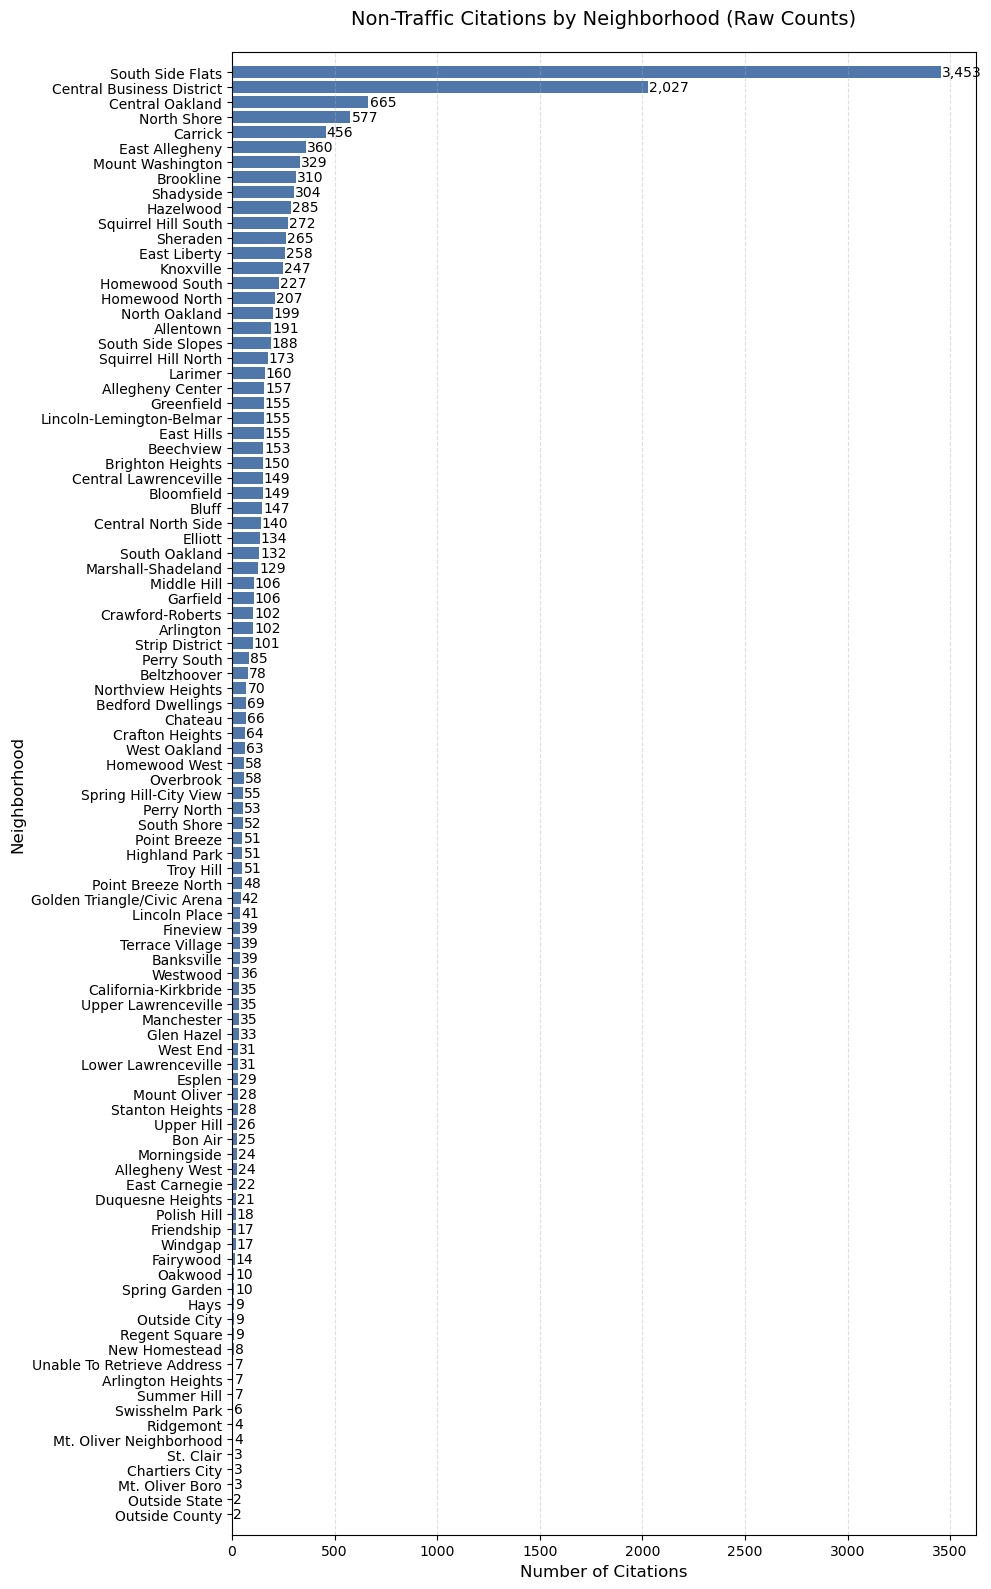

In [45]:
# Get neighborhood counts (sorted ascending)
neighborhood_counts = citations['NEIGHBORHOOD'].value_counts().sort_values()

# Create plot
plt.figure(figsize=(10, 16))
bars = plt.barh(neighborhood_counts.index, neighborhood_counts.values, 
               color='#4f77aa', height=0.8)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, 
             f'{int(width):,}', 
             va='center', ha='left', fontsize=10)

# Formatting
plt.title('Non-Traffic Citations by Neighborhood (Raw Counts)', fontsize=14, pad=20)
plt.xlabel('Number of Citations', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.margins(y=0.01)
plt.tight_layout()
plt.show()

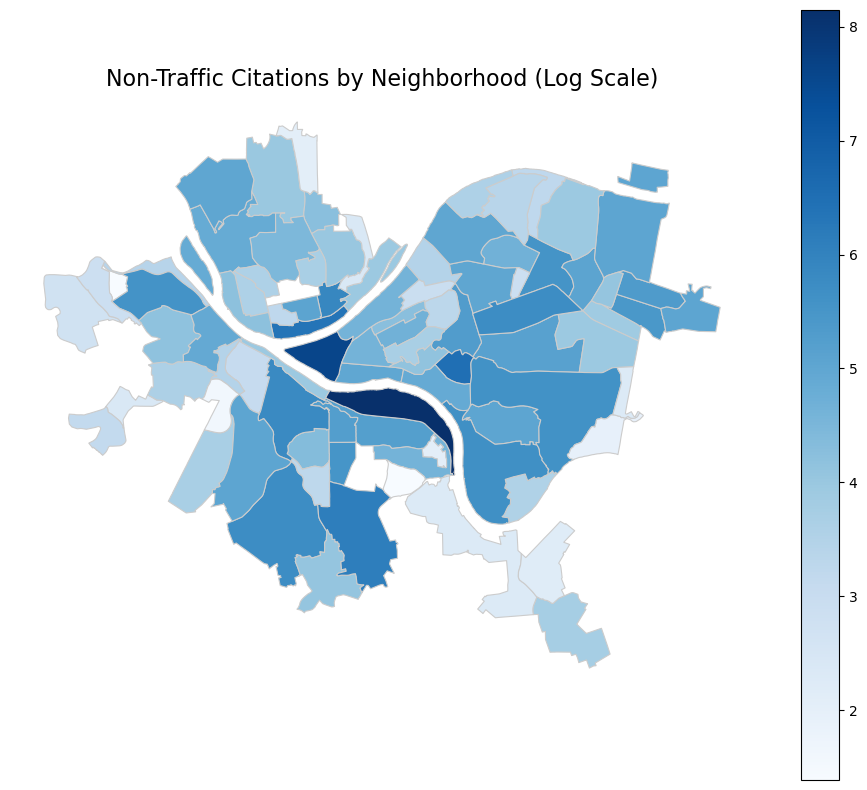

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load citation data
citations = pd.read_csv('citations.csv')

# Keep relevant columns
cols_to_keep = ['NEIGHBORHOOD', 'X', 'Y']
citations = citations[cols_to_keep]

# Drop rows without a neighborhood
citations = citations.dropna(subset=['NEIGHBORHOOD'])

# Count citations per neighborhood
citation_counts = citations['NEIGHBORHOOD'].value_counts().reset_index()
citation_counts.columns = ['NEIGHBORHOOD', 'Citation_Count']

# Load the shapefile for Pittsburgh neighborhoods
gdf = gpd.read_file("Neighborhoods_.shp")

# Merge citation counts with geodata
merged = gdf.merge(citation_counts, how='left', left_on='hood', right_on='NEIGHBORHOOD')

# Add a small constant to avoid log(0)
merged['Citation_Count_Log'] = np.log1p(merged['Citation_Count'])

fig, ax = plt.subplots(figsize=(12, 10))
merged.plot(column='Citation_Count_Log', 
            cmap='Blues', 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8', 
            legend=True)

ax.set_title('Non-Traffic Citations by Neighborhood (Log Scale)', fontsize=16)
ax.axis('off')
plt.show()



## 🧠 Conclusion / Personal Reflection

I found this analysis eye-opening. Before starting this project, I assumed certain neighborhoods were safer than others based on reputation. However, the data challenged some of those assumptions. For example, while South Side Flats is known for its entertainment scene, it also appears to have a high rate of minor offenses. This makes me think more about what makes a neighborhood feel safe versus what the data shows. My personal favorite neighborhood may not score highest in the data, but that contrast is part of what makes this project interesting.
